In [162]:
import numpy as np
import pandas as pd
import re

In [480]:
data=pd.read_excel('../Data/한국마사회_경주상세정보(제주_부경)_20230720.xlsx')

In [481]:
unicol_list = []
for col in data.columns:
    if data[1:][col].nunique()<=1:
        unicol_list.append(col)
drop_data = data.drop(unicol_list,axis=1) 

In [76]:
unicol_list[24:]

['BU_2F-G_TIME',
 'BU_3F-G_TIME',
 'BU_1F-G_TIME',
 'BU_S1F_ACC_TIME',
 'BU_G8F_ACC_TIME',
 'BU_G6F_ACC_TIME',
 'BU_G4F_ACC_TIME',
 'BU_G3F_ACC_TIME',
 'BU_G2F_ACC_TIME',
 'BU_G1F_ACC_TIME']

In [482]:
drop_data["WG"] = drop_data["WG_HR"].str.extract(r'(\d+)(?=\()')
drop_data["WG"][0]="마체중"

drop_data["WC"] = drop_data["WG_HR"].str.extract(r'\((.*?)\)')
drop_data["WC"][0] = "체중증감"

drop_data["WC"][1:] = pd.to_numeric(drop_data["WC"][1:])
drop_data["WG"][1:] = pd.to_numeric(drop_data["WG"][1:])

drop_data = drop_data.drop(["WG_HR"],axis=1)

In [483]:
#한글 이름을 열로 바꿔줌
drop_data.columns=drop_data.iloc[0]
drop_data=drop_data[1:]
drop_data

,경주일자,경주번호,경주거리,경주등급,날씨,주로상태(함수율),착순,출주번호,마명,마번,마필연령,마필성별,경주기록(초),경주마통산1착횟수,경주마통산2착횟수,경주마통산출전횟수,경주마최근1년1착횟수,경주마최근1년2착횟수,경주마최근1년출전횟수,부담중량,기수명,기수번호,기수연령,기수경력(년),기수통산1착횟수,기수통산2착횟수,기수통산출전횟수,기수최근1년간1착횟수,기수최근1년간2착횟수,기수최근1년간출전횟수,조교사명,조교사번호,조교사경력(년),조교사통산1착횟수,조교사통산2착횟수,조교사통산출전횟수,조교사최근1년간1착횟수,조교사최근1년간2착횟수,조교사최근1년간출전횟수,조교사위탁경주마1위횟수,조교사위탁경주마2위횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감
1,20230701,1,800,제6등급,흐림,포화 (18%),1,9,한백제왕,3101848,3,거,65.2,1,0,2,1,0,2,55,김준호,003081,30,9,411,337,3025,64,50,413,김영래,002019,27,1547,1235,10161,48,32,321,90,46,366,2,0,0,2,2,1,16.8,0,0,16.8,48.4,31.2,18.4,311,-18.0
2,20230701,1,800,제6등급,흐림,포화 (18%),2,2,명의로운,3102087,3,암,67.3,0,1,5,0,1,5,54,원유일,003075,36,13,444,469,4730,26,30,402,변용호,002013,29,1211,1313,12538,15,24,343,31,81,633,1,0,0,1,1,2,16.6,0,0,16.6,50.7,31.2,19.5,283,-6.0
3,20230701,1,800,제6등급,흐림,포화 (18%),3,3,번개의꿈,3101489,4,수,67.5,0,0,5,0,0,5,55,전현준,003070,35,18,959,810,6130,69,54,434,윤덕상,002021,27,1036,1279,12632,24,49,493,79,76,724,7,0,0,7,6,4,17.8,0,0,17.8,49.7,33,17.6,271,-5.0
4,20230701,1,800,제6등급,흐림,포화 (18%),4,6,고차원,3103528,2,암,67.6,0,0,3,0,0,3,54,이성민,003092,29,6,126,142,1573,28,36,389,윤덕상,002021,27,1036,1279,12632,24,49,493,79,76,724,6,0,0,6,7,5,17.6,0,0,17.6,50,33.2,17.7,265,-8.0
5,20230701,1,800,제6등급,흐림,포화 (18%),5,1,위너고,3102911,3,암,67.7,0,0,6,0,0,6,53,정명일,003044,48,27,704,668,6670,18,20,274,고성동,002008,32,1161,1232,12436,19,31,400,75,88,892,8,0,0,8,8,7,18.2,0,0,18.2,49.5,33.5,17.5,265,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29588,20190111,9,900,한4등급,흐림,양호 (8%),6,8,백년친구,1017787,3,암,64.1,2,3,15,0,0,0,54.5,권진영,003078,36,10,154,175,1960,0,0,0,박병진,002028,19,927,936,7980,39,35,381,184,192,1561,2,0,0,2,2,3,14.7,0,0,21.4,42.7,34.9,15,308,5.0
29589,20190111,9,900,한4등급,흐림,양호 (8%),7,3,미래제주,1017443,4,암,64.2,0,0,8,0,0,0,57,전현준,003070,35,18,959,810,6130,69,54,434,이준호,002029,17,666,702,6512,54,48,432,101,144,1151,4,0,0,4,4,4,15.2,0,0,21.9,42.3,35.2,14.9,311,-2.0
29590,20190111,9,900,한4등급,흐림,양호 (8%),8,1,남단여제,1017686,3,암,64.5,2,2,19,0,0,0,53,김이랑,003038,48,26,556,678,6435,0,0,0,신경호,002018,27,1021,1102,10781,41,50,350,112,104,1174,8,0,0,6,6,10,15.6,0,0,22.3,42.2,35.6,14.8,282,-4.0
29591,20190111,9,900,한4등급,흐림,양호 (8%),9,4,섬문화,1017765,4,암,64.6,0,2,26,0,0,0,54,문성호,003029,51,31,1141,1206,10297,22,18,233,좌윤철,002009,32,1078,1277,13727,33,27,360,74,98,1027,9,0,0,9,8,9,15.7,0,0,22.5,42.1,35.9,14.9,316,4.0


In [484]:
#1착, 2착 횟수가 높다고 좋은 것이 아니라 승률이 높아야 좋다고 생각하기에, 경주마, 기수, 조교수, 위탁 각각의 승률을 새로운 열에 추가해주었다.
drop_data['경주마통산1착승률']=drop_data['경주마통산1착횟수']/drop_data['경주마통산출전횟수'].replace(0,1)
drop_data['경주마통산2찬승률']=drop_data['경주마통산2착횟수']/drop_data['경주마통산출전횟수'].replace(0,1)
drop_data['경주마최근1년1착승률']=drop_data['경주마최근1년1착횟수']/drop_data['경주마최근1년출전횟수'].replace(0,1)
drop_data['경주마최근1년2착승률']=drop_data['경주마최근1년2착횟수']/drop_data['경주마최근1년출전횟수'].replace(0,1)

drop_data['기수통산1착승률']=drop_data['기수통산1착횟수']/drop_data['기수통산출전횟수'].replace(0,1)
drop_data['기수통산2착승률']=drop_data['기수통산2착횟수']/drop_data['기수통산출전횟수'].replace(0,1)
drop_data['기수최근1년간1착승률']=drop_data['기수최근1년간1착횟수']/drop_data['기수최근1년간출전횟수'].replace(0,1)
drop_data['기수최근1년간2착승률']=drop_data['기수최근1년간2착횟수']/drop_data['기수최근1년간출전횟수'].replace(0,1)

drop_data['조교사통산1착승률']=drop_data['조교사통산1착횟수']/drop_data['조교사통산출전횟수'].replace(0,1)
drop_data['조교사통산2착승률']=drop_data['조교사통산2착횟수']/drop_data['조교사통산출전횟수'].replace(0,1)
drop_data['조교사최근1년간1착승률']=drop_data['조교사최근1년간1착횟수']/drop_data['조교사최근1년간출전횟수'].replace(0,1)
drop_data['조교사최근1년간2착승률']=drop_data['조교사최근1년간2착횟수']/drop_data['조교사최근1년간출전횟수'].replace(0,1)

drop_data['조교사위탁경주마1위승률']=drop_data['조교사위탁경주마1위횟수']/drop_data['조교사위탁경주마출전횟수'].replace(0,1)
drop_data['조교사위탁경주마2위승률']=drop_data['조교사위탁경주마2위횟수']/drop_data['조교사위탁경주마출전횟수'].replace(0,1)


In [485]:
#주로상태(함수율) 데이터가 포화(18%)로 되어 있는 것을 포화, 18로 바꿔주었다.
drop_data[['주로상태','주로상태_함수율']]=drop_data['주로상태(함수율)'].str.extract(r'(.*?) \((\d+)%\)')
drop_data=drop_data.drop('주로상태(함수율)',axis=1)

In [486]:
drop_data[['혈통','등급']]=drop_data['경주등급'].str.extract(r'(\D)(.*)')

In [487]:
drop_data['혈통']=drop_data['혈통'].str.replace('제','제주').str.replace('한','한라')

In [488]:
drop_data=drop_data.drop('경주등급',axis=1)

In [73]:
drop_data.to_excel('경마데이터.xls',index=False)

C:\Users\wjswp\AppData\Local\Temp\ipykernel_16784\3188981914.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  drop_data.to_excel('경마데이터.xls',index=False)


In [489]:
#다시시작
horse_data=pd.read_excel('경마데이터.xls')
horse_data.columns
drop_feature=['마번','기수통산출전횟수','기수최근1년간출전횟수','날씨','경주마통산1착횟수','경주마통산2착횟수','경주마최근1년1착횟수','경주마최근1년2착횟수','기수명','기수번호','기수연령','기수통산1착횟수','기수통산2착횟수','기수최근1년간1착횟수','기수최근1년간2착횟수','조교사명','조교사번호','조교사통산1착횟수','조교사통산2착횟수','조교사최근1년간1착횟수','조교사최근1년간2착횟수','조교사위탁경주마1위횟수','조교사위탁경주마2위횟수','주로상태']
horse_data=horse_data.drop(columns=drop_feature)

In [20]:
np.unique(horse_data['경주거리'])
horse_data_800=horse_data[horse_data['경주거리']==800]
horse_data_900=horse_data[horse_data['경주거리']==900]
horse_data_1000=horse_data[horse_data['경주거리']==1000]
horse_data_1100=horse_data[horse_data['경주거리']==1100]
horse_data_1200=horse_data[horse_data['경주거리']==1200]
horse_data_1400=horse_data[horse_data['경주거리']==1400]
horse_data_1610=horse_data[horse_data['경주거리']==1610]
horse_data_1700=horse_data[horse_data['경주거리']==1700]
horse_data_1800=horse_data[horse_data['경주거리']==1800]

In [438]:
horse_data

,경주일자,경주번호,경주거리,착순,출주번호,마명,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급
0,20230701,1,800,1,9,한백제왕,3,거,65.2,2,2,55.0,9,27,10161.0,321.0,366,2,0,0,2,2,1,16.8,0.0,0.0,16.8,48.4,31.2,18.4,311,-18.0,0.500000,0.000000,0.5,0.0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.245902,0.125683,18,제주,6등급
1,20230701,1,800,2,2,명의로운,3,암,67.3,5,5,54.0,13,29,12538.0,343.0,633,1,0,0,1,1,2,16.6,0.0,0.0,16.6,50.7,31.2,19.5,283,-6.0,0.000000,0.200000,0.0,0.2,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.048973,0.127962,18,제주,6등급
2,20230701,1,800,3,3,번개의꿈,4,수,67.5,5,5,55.0,18,27,12632.0,493.0,724,7,0,0,7,6,4,17.8,0.0,0.0,17.8,49.7,33.0,17.6,271,-5.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
3,20230701,1,800,4,6,고차원,2,암,67.6,3,3,54.0,6,27,12632.0,493.0,724,6,0,0,6,7,5,17.6,0.0,0.0,17.6,50.0,33.2,17.7,265,-8.0,0.000000,0.000000,0.0,0.0,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
4,20230701,1,800,5,1,위너고,3,암,67.7,6,6,53.0,27,32,12436.0,400.0,892,8,0,0,8,8,7,18.2,0.0,0.0,18.2,49.5,33.5,17.5,265,-2.0,0.000000,0.000000,0.0,0.0,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.084081,0.098655,18,제주,6등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29587,20190111,9,900,6,8,백년친구,3,암,64.1,15,0,54.5,10,19,7980.0,381.0,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5.0,0.133333,0.200000,0.0,0.0,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,한라,4등급
29588,20190111,9,900,7,3,미래제주,4,암,64.2,8,0,57.0,18,17,6512.0,432.0,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,한라,4등급
29589,20190111,9,900,8,1,남단여제,3,암,64.5,19,0,53.0,26,27,10781.0,350.0,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4.0,0.105263,0.105263,0.0,0.0,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,한라,4등급
29590,20190111,9,900,9,4,섬문화,4,암,64.6,26,0,54.0,31,32,13727.0,360.0,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4.0,0.000000,0.076923,0.0,0.0,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,한라,4등급


In [437]:
pd.set_option('display.max_columns',None)
horse_data_800.columns
#서울제주 1코너 2코너
drop_feature_800=['서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','제주1코너통과기록','제주2코너통과기록']
horse_data_800=horse_data_800.drop(columns=drop_feature_800)

KeyError: "['서울,제주1코너구간통과순위(서울,제주공통)', '서울,제주2코너구간통과순위(서울,제주공통)', '제주1코너통과기록', '제주2코너통과기록'] not found in axis"

0        무대바람
1        마의질주
2        쾌속비행
3       포르티우스
4        광명일호
        ...  
1998       아신
1999     미소만발
2000     우당대목
2001       한산
2002       신조
Name: 0, Length: 2001, dtype: object

In [490]:
majong_data=pd.read_excel('마종데이터.xls')
majong_data['name']=horse_list
majong_feature=['ranks','horse_rate','dad_record','dad_rate','mom_record','mom_rate','name']
majong_data=majong_data[majong_feature]

In [491]:
majong_data.reset_index(drop=True,inplace=True)
dad_rate=np.zeros(len(majong_data))
mom_rate=np.zeros(len(majong_data))
dad_total3=np.zeros(len(majong_data))
mom_total3=np.zeros(len(majong_data))
dad_total=np.zeros(len(majong_data))
mom_total=np.zeros(len(majong_data))

#아빠 승률
for i in range(len(majong_data)):
    dad=majong_data['dad_record'][i]
    if (dad=='None' or dad=='전 (////)' or dad=='0전 (0/0/0/0/0)'):
        dad_rate[i]=None
        dad_total3[i]=None
        dad_total[i]=None
    else:
        b=re.findall(r'\d+',dad)
        b=list(map(int,b))
        dad_rate[i]=round((b[1]+b[2]+b[3])/b[0],2)
        dad_total3[i]=b[1]+b[2]+b[3]
        dad_total[i]=b[0]

#엄마 승률
for i in range(len(majong_data)):
    mom=majong_data['mom_record'][i]
    if (mom=='None' or mom=='전 (////)' or mom=='0전 (0/0/0/0/0)'):
        mom_rate[i]=None
        mom_total3[i]=None
        mom_total[i]=None
    else:
        b=re.findall(r'\d+',mom)
        b=list(map(int,b))
        mom_rate[i]=round((b[1]+b[2]+b[3])/b[0],2)
        mom_total3[i]=b[1]+b[2]+b[3]
        mom_total[i]=b[0]

In [492]:
majong_data['mom_rating']=mom_rate
majong_data['dad_rating']=dad_rate
majong_data['mom_total_in3']=mom_total3
majong_data['dad_total_in3']=dad_total3
majong_data['mom_total']=mom_total
majong_data['dad_total']=dad_total
majong_data.to_excel('majong_tochang_ver_2.xlsx')

In [493]:
result_vec=[]
for j in range(len(majong_data)):
    a=majong_data['horse_rate'][j]
    b=eval(a)
    date_list=[]
    number_list=[]
    for i in b:
        match=re.search(r'(\d{4}/\d{2}/\d{2})-\d+[Rr] (\d+)', i)
        if match:
            date = int(match.group(1).replace('/', ''))
            number = int(match.group(2))
            date_list.append(date)
            number_list.append(number)
        else:
            pass
    result_matrix=[majong_data['name'][j],date_list,number_list]
    result_vec.append(result_matrix)

#result_vec[i][0]는 이름
#result_vec[i][1]는 날짜
#result_vec[i][2]는 레이팅

In [494]:
pd.DataFrame(result_vec).iloc[:,0].nunique()

2001

In [379]:
name=[]
for i in range(len(result_vec)):
    name.append(result_vec[i][0])
for i in name:
    if i=="무대바람":
        print('bc')


bc


In [505]:
horse_data

,경주일자,경주번호,경주거리,착순,출주번호,마명,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급
0,20230701,1,800,1,9,한백제왕,3,거,65.2,2,2,55.0,9,27,10161.0,321.0,366,2,0,0,2,2,1,16.8,0.0,0.0,16.8,48.4,31.2,18.4,311,-18.0,0.500000,0.000000,0.5,0.0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.245902,0.125683,18,제주,6등급
1,20230701,1,800,2,2,명의로운,3,암,67.3,5,5,54.0,13,29,12538.0,343.0,633,1,0,0,1,1,2,16.6,0.0,0.0,16.6,50.7,31.2,19.5,283,-6.0,0.000000,0.200000,0.0,0.2,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.048973,0.127962,18,제주,6등급
2,20230701,1,800,3,3,번개의꿈,4,수,67.5,5,5,55.0,18,27,12632.0,493.0,724,7,0,0,7,6,4,17.8,0.0,0.0,17.8,49.7,33.0,17.6,271,-5.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
3,20230701,1,800,4,6,고차원,2,암,67.6,3,3,54.0,6,27,12632.0,493.0,724,6,0,0,6,7,5,17.6,0.0,0.0,17.6,50.0,33.2,17.7,265,-8.0,0.000000,0.000000,0.0,0.0,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
4,20230701,1,800,5,1,위너고,3,암,67.7,6,6,53.0,27,32,12436.0,400.0,892,8,0,0,8,8,7,18.2,0.0,0.0,18.2,49.5,33.5,17.5,265,-2.0,0.000000,0.000000,0.0,0.0,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.084081,0.098655,18,제주,6등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29587,20190111,9,900,6,8,백년친구,3,암,64.1,15,0,54.5,10,19,7980.0,381.0,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5.0,0.133333,0.200000,0.0,0.0,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,한라,4등급
29588,20190111,9,900,7,3,미래제주,4,암,64.2,8,0,57.0,18,17,6512.0,432.0,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,한라,4등급
29589,20190111,9,900,8,1,남단여제,3,암,64.5,19,0,53.0,26,27,10781.0,350.0,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4.0,0.105263,0.105263,0.0,0.0,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,한라,4등급
29590,20190111,9,900,9,4,섬문화,4,암,64.6,26,0,54.0,31,32,13727.0,360.0,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4.0,0.000000,0.076923,0.0,0.0,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,한라,4등급


In [385]:
a=0
for i in range(len(result_vec)):
    a=a+len(result_vec[i][1])
a
result_vec[0][1][0]==20201219
#horse_data['경주일자'][0]==20230701

True

In [506]:
horse_data['레이팅']=0
horse_data
for i in range(len(result_vec)):
    for k in range(len(result_vec[i][1])):
        horse_data.loc[(horse_data['마명']==result_vec[i][0]) & (horse_data['경주일자']==result_vec[i][1][k]),'레이팅']=result_vec[i][2][k]
#horse_data=horse_data[horse_data['경주일자']<20230732]
horse_data

,경주일자,경주번호,경주거리,착순,출주번호,마명,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅
0,20230701,1,800,1,9,한백제왕,3,거,65.2,2,2,55.0,9,27,10161.0,321.0,366,2,0,0,2,2,1,16.8,0.0,0.0,16.8,48.4,31.2,18.4,311,-18.0,0.500000,0.000000,0.5,0.0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.245902,0.125683,18,제주,6등급,0.0
1,20230701,1,800,2,2,명의로운,3,암,67.3,5,5,54.0,13,29,12538.0,343.0,633,1,0,0,1,1,2,16.6,0.0,0.0,16.6,50.7,31.2,19.5,283,-6.0,0.000000,0.200000,0.0,0.2,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.048973,0.127962,18,제주,6등급,0.0
2,20230701,1,800,3,3,번개의꿈,4,수,67.5,5,5,55.0,18,27,12632.0,493.0,724,7,0,0,7,6,4,17.8,0.0,0.0,17.8,49.7,33.0,17.6,271,-5.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급,0.0
3,20230701,1,800,4,6,고차원,2,암,67.6,3,3,54.0,6,27,12632.0,493.0,724,6,0,0,6,7,5,17.6,0.0,0.0,17.6,50.0,33.2,17.7,265,-8.0,0.000000,0.000000,0.0,0.0,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급,0.0
4,20230701,1,800,5,1,위너고,3,암,67.7,6,6,53.0,27,32,12436.0,400.0,892,8,0,0,8,8,7,18.2,0.0,0.0,18.2,49.5,33.5,17.5,265,-2.0,0.000000,0.000000,0.0,0.0,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.084081,0.098655,18,제주,6등급,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29587,20190111,9,900,6,8,백년친구,3,암,64.1,15,0,54.5,10,19,7980.0,381.0,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5.0,0.133333,0.200000,0.0,0.0,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,한라,4등급,0.0
29588,20190111,9,900,7,3,미래제주,4,암,64.2,8,0,57.0,18,17,6512.0,432.0,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,한라,4등급,0.0
29589,20190111,9,900,8,1,남단여제,3,암,64.5,19,0,53.0,26,27,10781.0,350.0,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4.0,0.105263,0.105263,0.0,0.0,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,한라,4등급,0.0
29590,20190111,9,900,9,4,섬문화,4,암,64.6,26,0,54.0,31,32,13727.0,360.0,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4.0,0.000000,0.076923,0.0,0.0,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,한라,4등급,0.0


In [517]:
horse_data=horse_data[horse_data['착순']<50]
horse_data=horse_data.reset_index()
horse_data=horse_data.drop(columns='index')

In [518]:
num=0
num_list=[]
for i in range(len(horse_data)):
    if num<horse_data["착순"][i]:
        num=horse_data["착순"][i]
    else:
        num_list.append(num)
        num=horse_data["착순"][i]

In [536]:
parent_index=['mom_rating','dad_rating','mom_total_in3','dad_total_in3','mom_total','dad_total']
horse_data[parent_index] = 0

for i in range(len(majong_data)):
    index_to_update = horse_data['마명'] == majong_data['name'][i]
    horse_data.loc[index_to_update, parent_index[0]] = majong_data[parent_index[0]][i]
    horse_data.loc[index_to_update, parent_index[1]] = majong_data[parent_index[1]][i]
    horse_data.loc[index_to_update, parent_index[2]] = majong_data[parent_index[2]][i]
    horse_data.loc[index_to_update, parent_index[3]] = majong_data[parent_index[3]][i]
    horse_data.loc[index_to_update, parent_index[4]] = majong_data[parent_index[4]][i]
    horse_data.loc[index_to_update, parent_index[5]] = majong_data[parent_index[5]][i]

print(horse_data)

           경주일자  경주번호  경주거리  착순  출주번호    마명  마필연령 마필성별  경주기록(초)  경주마통산출전횟수  \
0      20230701     1   800   1     9  한백제왕     3    거     65.2          2   
1      20230701     1   800   2     2  명의로운     3    암     67.3          5   
2      20230701     1   800   3     3  번개의꿈     4    수     67.5          5   
3      20230701     1   800   4     6   고차원     2    암     67.6          3   
4      20230701     1   800   5     1   위너고     3    암     67.7          6   
...         ...   ...   ...  ..   ...   ...   ...  ...      ...        ...   
28836  20190111     9   900   6     8  백년친구     3    암     64.1         15   
28837  20190111     9   900   7     3  미래제주     4    암     64.2          8   
28838  20190111     9   900   8     1  남단여제     3    암     64.5         19   
28839  20190111     9   900   9     4   섬문화     4    암     64.6         26   
28840  20190111     9   900  10     6  불멸의힘     3    암     65.1         18   

       경주마최근1년출전횟수  부담중량  기수경력(년)  조교사경력(년)  조교사통산출전횟수  조교사최근1년

In [540]:
horse_data.to_excel('merge_ma_hor.xlsx')

In [539]:
majong_data[majong_data['name']=='섬문화']

,ranks,horse_rate,dad_record,dad_rate,mom_record,mom_rate,name,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total
91,"['한3 2019/03/24 ~ 2022/12/30', '한4 2018/10/25 ...","['2021/06/11-10R 33', '2021/03/26-7R 34', '202...",None,None,None,None,섬문화,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])

17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64


0       -18.0
1        -6.0
2        -5.0
3        -8.0
4        -2.0
         ... 
29587     5.0
29588    -2.0
29589    -4.0
29590     4.0
29591    -7.0
Name: 체중증감, Length: 28841, dtype: float64

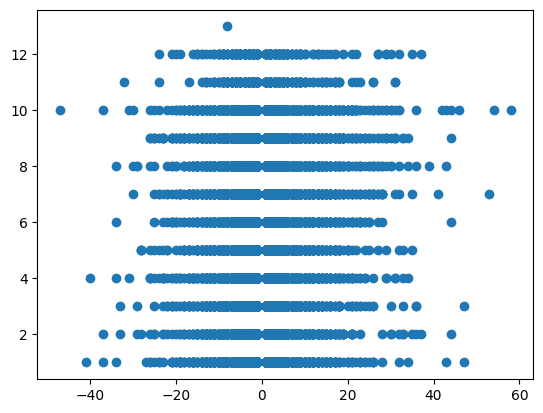

In [218]:
import numpy as np
import matplotlib.pyplot as plt

horse_data=horse_data[horse_data['착순']<80]
horse_data['착순']
horse_data['부담중량']
#plt.scatter(horse_data['부담중량'],horse_data['착순'])
corrr=np.corrcoef(horse_data['부담중량'],horse_data['착순'])[0,1]
plt.scatter(horse_data['체중증감'],horse_data['착순'])
np.corrcoef(horse_data['체중증감'],horse_data['착순'])[0,1]
horse_data['체중증감']

In [643]:
#11월 28일 다시시작
drop_columns=['서울,제주S1F구간통과순위(서울,제주공통)','서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','서울,제주3코너구간통과순위(서울,제주공통)','서울,제주4코너구간통과순위(서울,제주공통)','서울,제주G1F구간통과순위(서울,제주공통)','제주S-1F통과기록','제주1코너통과기록','제주2코너통과기록','제주3코너통과기록','제주G-3F통과기록','제주G-1F통과기록']
a=pd.read_excel("C:/Users/wjswp/Documents/GitHub/HorceRacingPrediction2023/Data/final_merge.xlsx")
merge_data=a.drop(columns=drop_columns)

In [644]:
merge_data=merge_data.drop(columns=['Unnamed: 0'])
merge_data

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,1.037848,0.993131,-0.754877,-1.293341,-0.230165,-1.283846,1.607346,0.632445,0.821772,0.477099,1.483899,-0.949783,-0.910064,0.308688,2.093905,-0.077733,0.152808,4,1,0.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,4.8,110,56,0.0,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572
1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.115316,0.219819,-0.009616,0.220449,-0.997380,1.716714,-2.447220,-1.813527,-1.550703,-0.553510,0.046051,0.119013,0.683781,-0.090172,-0.556122,0.120039,-0.574808,4,1,0.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,4.8,110,56,0.0,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662
2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.691898,-0.684358,-0.923162,-1.419970,0.281312,-0.300056,0.448898,1.217072,0.984041,1.481690,0.975211,2.251169,1.720409,1.395968,0.275789,1.891531,0.304127,4,1,0.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,4.8,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572
3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.576582,-0.479228,1.528988,1.590344,-1.508858,1.224819,1.028122,1.385996,1.559213,1.233122,0.953384,0.458424,1.226856,0.967944,0.392230,0.293418,0.677529,4,1,0.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,4.8,110,56,0.0,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616
4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.115316,0.013031,-0.346186,0.254985,0.792790,-0.546004,0.014481,-0.860116,-0.599244,-0.810965,-0.933508,-0.700488,-1.350570,-0.867153,0.333998,-0.980875,1.142443,4,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,27.9,0.0,4.8,110,56,0.0,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.459964,-0.407759,-0.167838,1.661219,-1.398589,0.381471,0.302063,-0.998704,-1.118542,-0.882692,-1.094640,1.073361,1.406952,0.289028,-0.396696,1.803004,1.318934,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.253474,1.609586,0.333333,0.333333
28679,20190111,9,900,7,3,1.527525,1,64.2,1.746409,0.072433,-0.730531,-0.841425,0.876034,0.190796,-0.662489,0.641565,-0.285281,2.442343,2.050307,2.251228,1.785575,0.176693,0.304561,0.961301,0.557588,0.038423,1.444387,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333
28680,20190111,9,900,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.622304,0.419693,-0.802349,0.273283,0.318976,-1.872676,-0.453094,-0.652663,0.070246,-0.882692,-1.094640,-0.311834,-0.343957,0.727968,2.131537,0.486581,-0.726579,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,0.031869,0.036986,0.333333,0.333333
28681,20190111,9,900,9,4,1.527525,1,64.6,-0.230658,1.955700,1.298721,1.289980,-0.597668,-0.253917,1.055076,1.075055,0.218156,0.425819,0.939910,0.978518,0.693648,-1.355633,-1.411075,-0.028597,-1.232779,-0.880981,-0.320144,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.6,0.0,1.9,270,64,0.0,12.0,7.875,-0.927190,-0.482149,0.333333,0.333333


In [645]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#for i in range(len(unique)):
#    merged_df.loc[(merged_df["경주일자"]==unique["경주일자"][i]) & (merged_df["경주번호"]==unique["경주번호"][i]) , scale_col] = scaler.fit_transform( merged_df.loc[(merged_df["경주일자"]==unique["경주일자"][i]) & (merged_df["경주번호"]==unique["경주번호"][i]) , scale_col])
#    merged_data.loc[()]
for i in range(len(merge_data)):
    if merge_data['풍속(m/s)'][i]<=0.2:
        merge_data['풍속(m/s)'][i]=0
    elif merge_data['풍속(m/s)'][i]<=1.5:
        merge_data['풍속(m/s)'][i]=1
    elif merge_data['풍속(m/s)'][i]<=3.3:
        merge_data['풍속(m/s)'][i]=2
    elif merge_data['풍속(m/s)'][i]<=5.4:
        merge_data['풍속(m/s)'][i]=3
    elif merge_data['풍속(m/s)'][i]<=7.9:
        merge_data['풍속(m/s)'][i]=4
    elif merge_data['풍속(m/s)'][i]<=10.7:
        merge_data['풍속(m/s)'][i]=5

C:\Users\wjswp\AppData\Local\Temp\ipykernel_7784\1374565169.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['풍속(m/s)'][i]=3
C:\Users\wjswp\AppData\Local\Temp\ipykernel_7784\1374565169.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['풍속(m/s)'][i]=2
C:\Users\wjswp\AppData\Local\Temp\ipykernel_7784\1374565169.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['풍속(m/s)'][i]=4
C:\Users\wjswp\AppD

In [585]:
import matplotlib.pyplot as plt
import seaborn as sns
a=merge_data[merge_data['레이팅']!=0]
b=a.corr()
b

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
경주일자,1.000000,0.048086,-0.011256,-0.010968,-0.007639,0.005995,-0.037929,-0.002079,-0.005361,-0.000965,0.004709,5.956130e-03,0.008589,0.003838,-0.003031,-0.000455,-0.001425,-0.001458,-0.002247,-0.006281,-0.011421,-0.009312,-0.007494,-0.008706,-0.011812,-0.010924,-0.015844,0.158633,NaN,-0.006477,0.146664,-0.001187,0.007024,0.092710,-0.096324,0.098868,3.125094e-03,-0.026221,-0.023199,-0.014007,0.006798,0.002107,-0.003703
경주번호,0.048086,1.000000,0.369873,0.021444,0.024871,-0.000032,-0.091075,-0.002092,0.002276,0.006599,-0.011199,-1.322665e-02,-0.004781,-0.002077,0.001896,-0.004474,0.003556,-0.002698,0.000228,-0.000909,0.005934,0.001078,0.006092,-0.000803,0.004237,0.001733,-0.024715,-0.092784,NaN,0.513022,-0.019607,0.129019,0.021354,0.020272,-0.046025,0.008003,4.190976e-02,0.088159,0.123382,0.002865,0.000157,0.004933,-0.000694
경주거리,-0.011256,0.369873,1.000000,-0.007032,0.002361,-0.004980,0.014631,-0.001872,0.000264,0.005831,-0.028516,-3.207585e-02,-0.023120,-0.008156,-0.006965,0.000286,0.012654,0.004828,0.011258,0.011327,0.024866,0.020859,0.028605,0.015077,0.025127,0.023377,0.015957,-0.642551,NaN,0.628006,-0.396008,-0.011658,0.026798,-0.005074,-0.014014,-0.006200,2.149940e-02,-0.010359,-0.011487,-0.003252,-0.002604,0.018580,0.002705
착순,-0.010968,0.021444,-0.007032,1.000000,0.082495,0.164859,0.018381,0.913556,-0.108677,0.021922,0.061132,5.260675e-02,-0.024147,-0.005408,-0.041602,0.047430,-0.168272,-0.169524,-0.161343,-0.131205,-0.097892,-0.102985,-0.104067,-0.053501,-0.105561,-0.120239,0.006318,0.030564,NaN,0.004049,0.008853,-0.013731,0.007504,0.006510,-0.001733,0.003326,3.635013e-03,-0.007647,-0.011469,-0.261349,-0.151558,-0.092109,-0.060105
출주번호,-0.007639,0.024871,0.002361,0.082495,1.000000,0.018056,-0.031506,0.055461,0.012443,-0.000423,0.001024,2.070152e-03,0.002236,-0.008053,0.005702,-0.010562,-0.001391,-0.005344,-0.000462,-0.002670,-0.006379,-0.006825,-0.003264,-0.000664,-0.004963,-0.004753,0.003737,0.029959,NaN,0.037218,0.029141,-0.009753,0.006327,0.007084,-0.001942,0.001467,4.814372e-03,-0.002500,-0.008167,-0.011216,-0.002974,-0.007447,0.009312
마필연령,0.005995,-0.000032,-0.004980,0.164859,0.018056,1.000000,-0.002582,0.162871,0.027049,0.043957,0.071117,5.207969e-02,-0.068631,0.063252,-0.081087,0.007135,-0.133785,-0.131739,-0.124001,-0.112839,-0.164392,-0.191141,-0.133623,-0.112201,-0.184108,-0.158040,-0.004058,0.006075,NaN,0.009288,-0.052164,0.001041,0.000360,-0.003334,0.001171,-0.000448,-3.979555e-04,0.001202,0.000336,-0.453003,-0.181550,-0.155236,-0.069918
마필성별,-0.037929,-0.091075,0.014631,0.018381,-0.031506,-0.002582,1.000000,0.028428,-0.037006,-0.001476,-0.007542,-2.345178e-03,-0.017083,0.019064,-0.000787,-0.020265,0.004362,0.011547,0.007938,0.010144,-0.006727,0.006771,-0.015601,-0.002944,0.005428,0.019030,0.000051,-0.183600,NaN,-0.149437,-0.086347,-0.001344,0.005217,-0.012317,0.005770,-0.004985,-6.133712e-03,-0.004020,-0.001860,0.031793,-0.038408,0.064345,-0.050104
경주기록(초),-0.002079,-0.002092,-0.001872,0.913556,0.055461,0.162871,0.028428,1.000000,-0.116414,0.018855,0.053813,4.492266e-02,-0.018521,-0.008011,-0.029692,0.052864,-0.160948,-0.163587,-0.153611,-0.119468,-0.090947,-0.095013,-0.095478,-0.046653,-0.098394,-0.116530,0.003697,-0.002269,NaN,-0.030212,-0.019055,-0.000589,-0.000442,0.000310,0.003053,0.003669,5.736902e-04,-0.001327,0.000919,-0.250030,-0.141462,-0.087855,-0.056502
부담중량,-0.005361,0.002276,0.000264,-0.108677,0.012443,0.027049,-0.037006,-0.116414,1.000000,0.152280,-0.050205,-5.450736e-02,-0.021523,0.027367,0.102558,0.012576,0.239268,0.252755,0.097790,0.090793,0.067679,0.071421,0.071519,0.032530,0.086156,0.059903,-0.004027,0.0

In [653]:
#풍향 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
categories = merge_data["풍향(16방위)"].unique().reshape(-1,1)
encoder.fit(categories)
data = pd.DataFrame(encoder.transform(merge_data[["풍향(16방위)"]]).toarray())
data.columns = encoder.categories_
merge_data=pd.concat([merge_data, data], axis=1)

c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [655]:
categories = merge_data["경주거리"].unique().reshape(-1,1)
encoder.fit(categories)
data = pd.DataFrame(encoder.transform(merge_data[["경주거리"]]).toarray())
data.columns = encoder.categories_
merge_data=pd.concat([merge_data, data], axis=1)

c:\Users\wjswp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [647]:
#혈통과 max_post는 상관관계성이 높음 혈통별 평균치를 결측치로 대체
marge_data=merge_data.drop(columns=['풍향(16방위)'])
b["max_post"].sort_values(ascending=False)
max_post1=np.mean(merge_data[merge_data['혈통']==1]['max_post'])
max_post0=np.mean(merge_data[merge_data['혈통']==0]['max_post'])

merge_data.loc[(merge_data['max_post']==0)&(merge_data['혈통']==1),'max_post']=max_post1
merge_data.loc[(merge_data['max_post']==0)&(merge_data['혈통']==0),'max_post']=max_post0


merge_data

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,1.037848,0.993131,-0.754877,-1.293341,-0.230165,-1.283846,1.607346,0.632445,0.821772,0.477099,1.483899,-0.949783,-0.910064,0.308688,2.093905,-0.077733,0.152808,4,1,0.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,3.0,110,56,0.0,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572
1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.115316,0.219819,-0.009616,0.220449,-0.997380,1.716714,-2.447220,-1.813527,-1.550703,-0.553510,0.046051,0.119013,0.683781,-0.090172,-0.556122,0.120039,-0.574808,4,1,0.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662
2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.691898,-0.684358,-0.923162,-1.419970,0.281312,-0.300056,0.448898,1.217072,0.984041,1.481690,0.975211,2.251169,1.720409,1.395968,0.275789,1.891531,0.304127,4,1,0.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572
3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.576582,-0.479228,1.528988,1.590344,-1.508858,1.224819,1.028122,1.385996,1.559213,1.233122,0.953384,0.458424,1.226856,0.967944,0.392230,0.293418,0.677529,4,1,0.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616
4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.115316,0.013031,-0.346186,0.254985,0.792790,-0.546004,0.014481,-0.860116,-0.599244,-0.810965,-0.933508,-0.700488,-1.350570,-0.867153,0.333998,-0.980875,1.142443,4,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.333456,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.459964,-0.407759,-0.167838,1.661219,-1.398589,0.381471,0.302063,-0.998704,-1.118542,-0.882692,-1.094640,1.073361,1.406952,0.289028,-0.396696,1.803004,1.318934,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,0.253474,1.609586,0.333333,0.333333
28679,20190111,9,900,7,3,1.527525,1,64.2,1.746409,0.072433,-0.730531,-0.841425,0.876034,0.190796,-0.662489,0.641565,-0.285281,2.442343,2.050307,2.251228,1.785575,0.176693,0.304561,0.961301,0.557588,0.038423,1.444387,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333
28680,20190111,9,900,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.622304,0.419693,-0.802349,0.273283,0.318976,-1.872676,-0.453094,-0.652663,0.070246,-0.882692,-1.094640,-0.311834,-0.343957,0.727968,2.131537,0.486581,-0.726579,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,0.031869,0.036986,0.333333,0.333333
28681,20190111,9,900,9,4,1.527525,1,64.6,-0.230658,1.955700,1.298721,1.289980,-0.597668,-0.253917,1.055076,1.075055,0.218156,0.425819,0.939910,0.978518,0.693648,-1.355633,-1.411075,-0.028597,-1.232779,-0.880981,-0.320144,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,-0.927190,-0.482149,0.333333,0.333333


In [649]:
merge_data[merge_data['레이팅']==0]['레이팅']=29
merge_data

C:\Users\wjswp\AppData\Local\Temp\ipykernel_7784\1642893877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data[merge_data['레이팅']==0]['레이팅']=29


,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,1.037848,0.993131,-0.754877,-1.293341,-0.230165,-1.283846,1.607346,0.632445,0.821772,0.477099,1.483899,-0.949783,-0.910064,0.308688,2.093905,-0.077733,0.152808,4,1,0.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,3.0,110,56,0.0,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572
1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.115316,0.219819,-0.009616,0.220449,-0.997380,1.716714,-2.447220,-1.813527,-1.550703,-0.553510,0.046051,0.119013,0.683781,-0.090172,-0.556122,0.120039,-0.574808,4,1,0.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662
2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.691898,-0.684358,-0.923162,-1.419970,0.281312,-0.300056,0.448898,1.217072,0.984041,1.481690,0.975211,2.251169,1.720409,1.395968,0.275789,1.891531,0.304127,4,1,0.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572
3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.576582,-0.479228,1.528988,1.590344,-1.508858,1.224819,1.028122,1.385996,1.559213,1.233122,0.953384,0.458424,1.226856,0.967944,0.392230,0.293418,0.677529,4,1,0.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616
4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.115316,0.013031,-0.346186,0.254985,0.792790,-0.546004,0.014481,-0.860116,-0.599244,-0.810965,-0.933508,-0.700488,-1.350570,-0.867153,0.333998,-0.980875,1.142443,4,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.333456,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,6,8,-0.654654,1,64.1,0.098853,-1.086500,-0.459964,-0.407759,-0.167838,1.661219,-1.398589,0.381471,0.302063,-0.998704,-1.118542,-0.882692,-1.094640,1.073361,1.406952,0.289028,-0.396696,1.803004,1.318934,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,0.253474,1.609586,0.333333,0.333333
28679,20190111,9,900,7,3,1.527525,1,64.2,1.746409,0.072433,-0.730531,-0.841425,0.876034,0.190796,-0.662489,0.641565,-0.285281,2.442343,2.050307,2.251228,1.785575,0.176693,0.304561,0.961301,0.557588,0.038423,1.444387,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,-0.691631,-1.451202,0.333333,0.333333
28680,20190111,9,900,8,1,-0.654654,1,64.5,-0.889680,1.231367,0.622304,0.419693,-0.802349,0.273283,0.318976,-1.872676,-0.453094,-0.652663,0.070246,-0.882692,-1.094640,-0.311834,-0.343957,0.727968,2.131537,0.486581,-0.726579,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,0.031869,0.036986,0.333333,0.333333
28681,20190111,9,900,9,4,1.527525,1,64.6,-0.230658,1.955700,1.298721,1.289980,-0.597668,-0.253917,1.055076,1.075055,0.218156,0.425819,0.939910,0.978518,0.693648,-1.355633,-1.411075,-0.028597,-1.232779,-0.880981,-0.320144,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.002883,7.6,0.0,2.0,270,64,0.0,12.0,7.875,-0.927190,-0.482149,0.333333,0.333333


In [657]:
merge_data.to_excel('fifinal_merge_data.xlsx')

In [622]:
syn_merge_data=merge_data.drop(columns=['경주일자','레이팅','등급'])

In [ ]:
from synthpop import Synthpop
spop=Synthpop()
spop.fit()

In [560]:
#0-0.2, 0.3-1.5, 1.6-3.3, 3.4-5.4, 5.5-7.9, 8.0-10.7
np.unique(merge_data['풍속(m/s)'])

array([1. , 1.1, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.1, 6.2, 6.3,
       6.4, 6.5, 6.7, 6.8, 7. , 7.1, 7.2, 7.3, 7.6, 7.7, 7.8, 8.3, 8.4,
       8.9, 9.3, 9.9])

In [641]:
a=merge_data[merge_data['레이팅']!=0]
b=a.corr()
b['레이팅'].sort_values(ascending=False)

레이팅                   1.000000
경주기록(초)               0.662060
경주거리                  0.628006
경주번호                  0.513022
mom_rating            0.325650
mom_total_in3         0.252381
부담중량                  0.180197
dad_rating            0.161759
dad_total_in3         0.127605
mom_total             0.127495
dad_post              0.082444
기수통산1착승률              0.053240
max_post              0.051827
기수통산2착승률              0.048629
horse_total_post1     0.041559
출주번호                  0.037218
조교사위탁경주마1위승률          0.034313
조교사최근1년간1착승률          0.032704
마체중                   0.030016
기수경력(년)               0.026738
조교사통산1착승률             0.026158
dad_total             0.024968
기수최근1년간2착승률           0.024548
3시간신적설(cm)            0.024534
기수최근1년간1착승률           0.023222
조교사통산2착승률             0.021712
horse_total_post2     0.019094
조교사위탁경주마2위승률          0.017436
주로상태_함수율              0.014338
풍속(m/s)               0.012519
습도(%)                 0.010527
조교사최근1년간2착승률          0.010178
마필연령    

In [640]:
merge_data.head(30)

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,dad_post,mom_post,max_post,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,horse_total_post1,horse_total_post2,horse_recent_post1,horse_recent_post2
0,20230624,1,800,1,1,-1.671258,-1,68.1,-0.256074,-0.457800,1.037848,0.993131,-0.754877,-1.293341,-0.230165,-1.283846,1.607346,0.632445,0.821772,0.477099,1.483899,-0.949783,-0.910064,0.308688,2.093905,-0.077733,0.152808,4,1,0.0,0,0.62,0.28,13.0,22.0,21.0,78.0,0.278107,0.527273,0.527273,27.9,0.0,3.0,110,56,0.0,46.2,26.275,2.897647,-0.679572,2.897647,-0.679572
1,20230624,1,800,2,4,0.185695,1,68.5,-0.896258,-1.635000,0.115316,0.219819,-0.009616,0.220449,-0.997380,1.716714,-2.447220,-1.813527,-1.550703,-0.553510,0.046051,0.119013,0.683781,-0.090172,-0.556122,0.120039,-0.574808,4,1,0.0,0,0.60,NaN,18.0,NaN,30.0,NaN,0.000000,0.534247,0.534247,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.446589,1.222662,-0.446589,1.222662
2,20230624,1,800,3,9,-1.671258,0,68.5,0.384111,-1.242600,-0.691898,-0.684358,-0.923162,-1.419970,0.281312,-0.300056,0.448898,1.217072,0.984041,1.481690,0.975211,2.251169,1.720409,1.395968,0.275789,1.891531,0.304127,4,1,0.0,0,0.83,NaN,5.0,NaN,6.0,NaN,0.000000,0.520000,0.520000,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572
3,20230624,1,800,4,3,0.185695,0,68.6,1.024295,0.327000,-0.576582,-0.479228,1.528988,1.590344,-1.508858,1.224819,1.028122,1.385996,1.559213,1.233122,0.953384,0.458424,1.226856,0.967944,0.392230,0.293418,0.677529,4,1,0.0,0,0.34,0.34,22.0,10.0,65.0,29.0,0.323944,0.328671,0.328671,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,2.100616,-0.128091,2.100616
4,20230624,1,800,5,8,0.185695,0,69.0,0.384111,-0.327000,0.115316,0.013031,-0.346186,0.254985,0.792790,-0.546004,0.014481,-0.860116,-0.599244,-0.810965,-0.933508,-0.700488,-1.350570,-0.867153,0.333998,-0.980875,1.142443,4,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.333456,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.858441,0.087377,-0.858441,0.087377
5,20230624,1,800,6,5,0.185695,1,70.2,-0.896258,1.111800,-1.499113,-1.475065,1.216459,-0.205484,-0.230165,-0.742762,0.014481,0.876464,0.588118,-0.199328,-0.034197,0.176886,0.400286,0.833045,0.323837,0.359688,-0.185320,4,1,0.0,0,0.55,NaN,6.0,NaN,11.0,NaN,0.000000,0.428571,0.428571,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.306075,-0.843112,-0.306075,-0.843112
6,20230624,1,800,7,10,0.185695,-1,70.7,2.304664,0.327000,1.268480,1.478212,-0.923162,-0.193972,1.560005,0.339408,-0.130325,-1.072755,-1.215353,-1.951646,-1.935138,-0.856023,-0.645263,-1.672332,-1.693837,-1.715505,1.637306,4,1,0.0,0,NaN,0.22,NaN,8.0,NaN,36.0,0.223529,0.000000,0.223529,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.560339,0.909107,-0.560339,0.909107
7,20230624,1,800,8,2,0.185695,1,70.8,-0.896258,1.111800,-1.268480,-1.330120,-1.452057,-1.091886,-0.997380,1.077250,-0.275131,-0.124872,-0.752057,0.520905,-0.120004,1.090441,0.437323,0.173942,-0.311370,0.127079,-1.093903,4,1,0.0,0,0.33,0.40,2.0,12.0,6.0,30.0,0.369863,0.280000,0.369863,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.128091,-0.679572,-0.128091,-0.679572
8,20230624,1,800,9,7,2.042649,0,71.1,-0.256074,-0.719400,-0.115316,-0.185474,1.216459,0.836326,1.560005,-1.283846,-0.275131,0.200219,0.698303,0.591560,0.559733,-0.572843,-0.319721,0.520715,0.444133,1.055325,-0.093177,4,1,0.0,0,0.33,NaN,5.0,NaN,15.0,NaN,0.000000,0.302326,0.302326,27.9,0.0,3.0,110,56,0.0,46.2,26.275,-0.446589,-0.972223,-0.446589,-0.972223
9,20230624,1,800,10,6,0.185695,1,72.0,-0.896258,1.504200,1.614430,1.450051,0.447157,1.302551,-0.230165,-0.201677,0.014481,-0.440925,-0.534090,-0.788927,-0.995429,-1.016797,-1.243037,-1.570645,-1.302563,-1.072967,-1.967005,4,1,0.0,0,0.27,0.22,10.0,8.0,37.0,36.0,0.223529,0.264368,0.264368,27.9,0.0,3.0,1

     -------------------------------------- 521.2/521.2 KB 3.3 MB/s eta 0:00:00
     -------------------------------------- 115.3/115.3 KB 3.4 MB/s eta 0:00:00
     -------------------------------------- 311.7/311.7 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 134.8/134.8 KB 2.7 MB/s eta 0:00:00
     -------------------------------------- 364.6/364.6 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 24.6/24.6 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 44.4/44.4 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 75.6/75.6 KB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\wjswp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
